## 1차원 데이타
 - 평균값(기대값), 표본과 분산, 불편분산(ddof=1), 표준편차
 - 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며, 그 경향을 없애기 위한것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
 - 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
 - 최댓값, 최솟값, 중앙값, 사분위수
 - 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재함
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을때는 표본분산이 모분산보다 작아진다.
 - 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향 분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
 [표본분산이 분산을 과소 평가하는 이유]
  - 

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [14]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [15]:
score_df = pd.DataFrame({'score':scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))

score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [20]:
#평균
print(sum(scores)/len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

In [21]:
#middle number
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [22]:
# 중앙값 계산하는 방식
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 -1]
median


56.5

In [23]:
# 확인하는방법1(numpy)
np.median(scores)

56.5

In [ ]:
# 확인하는방법(pandas)
score_df.median()

In [24]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [30]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [25]:
# 편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [63]:
np.mean(deviation)

0.0

In [26]:
# Q. 20개 원소로 구성되느느 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요
zeos = np.random.randint(0,19,size=20)
zeos

array([ 0, 18,  1, 10, 10, 11,  9, 17,  7,  2,  2,  6,  7,  9,  9, 15,  0,
        9,  4, 17])

In [27]:
mean = np.mean(zeos)
print(mean)
dev = zeos - mean
print(dev)
display(np.sum(dev))

8.15
[-8.15  9.85 -7.15  1.85  1.85  2.85  0.85  8.85 -1.15 -6.15 -6.15 -2.15
 -1.15  0.85  0.85  6.85 -8.15  0.85 -4.15  8.85]


-7.105427357601002e-15

분산 
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정 , 불편분산(편향이 없는 분산)은 ddof=1일때 해당됨.

In [28]:
np.mean(deviation ** 2)

86.0

In [29]:
np.var(scores)

86.0

In [30]:
score_df.var()

score    95.555556
dtype: float64

In [31]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [32]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [33]:
# 표준편차 구하는방법(pandas)
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [34]:
np.std(scores)

9.273618495495704

In [35]:
df.std()

score                   9.775252
deviation               9.775252
square of deviation    78.335461
dtype: float64

In [36]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [37]:
#4분위 구하기
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [38]:
# 요약 통계표 (판다스에서 사용가능)
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [39]:
# 데이터의 정규화

print(f'평균:{scores.mean()}, 표준편차: {scores.std().round(4)}')

평균:55.0, 표준편차: 9.2736


In [40]:
# 표준화(중요)   편차를 표준편차로 나눈 값
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [41]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [42]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [43]:
score_df['deviation_value'] = z

In [44]:
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [45]:
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [46]:
# 도수분포표
freq, _ = np.histogram(eng_scores, bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [47]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index = pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [48]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용돔
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [49]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [50]:
# 누적 상대 도수: 해당 계급까지 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [51]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] =  rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [52]:
# class에서의 최빈값 구하기
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

In [3]:
!pip install matplotlib

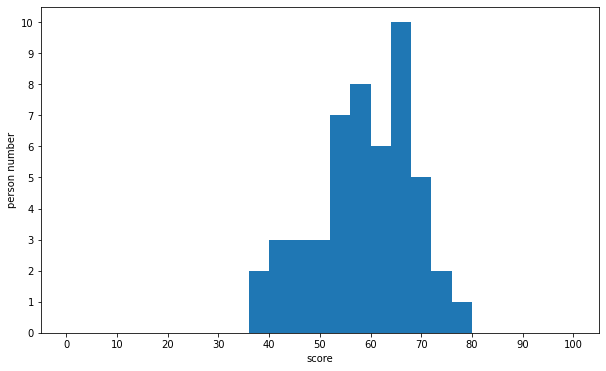

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq,_,_ = ax.hist(eng_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

# 범주를 어떻게 할것인가..

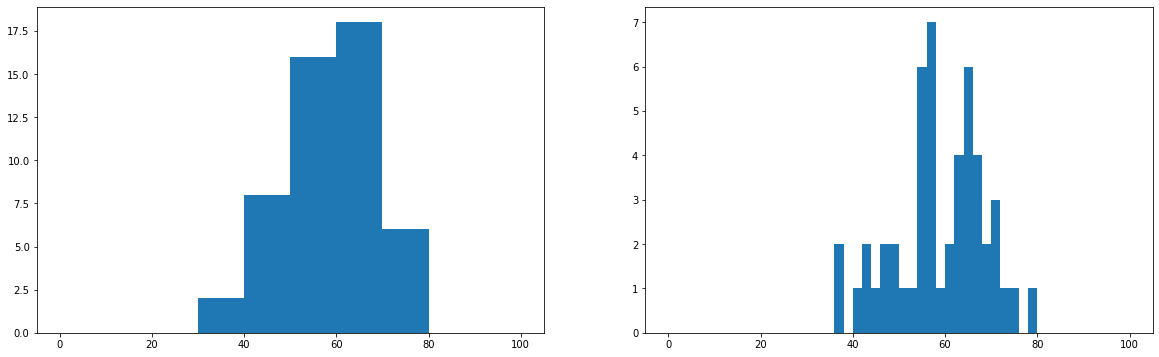

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq,_,_ = ax1.hist(eng_scores, bins=10, range=(0,100))
freq,_,_ = ax2.hist(eng_scores, bins=50, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()


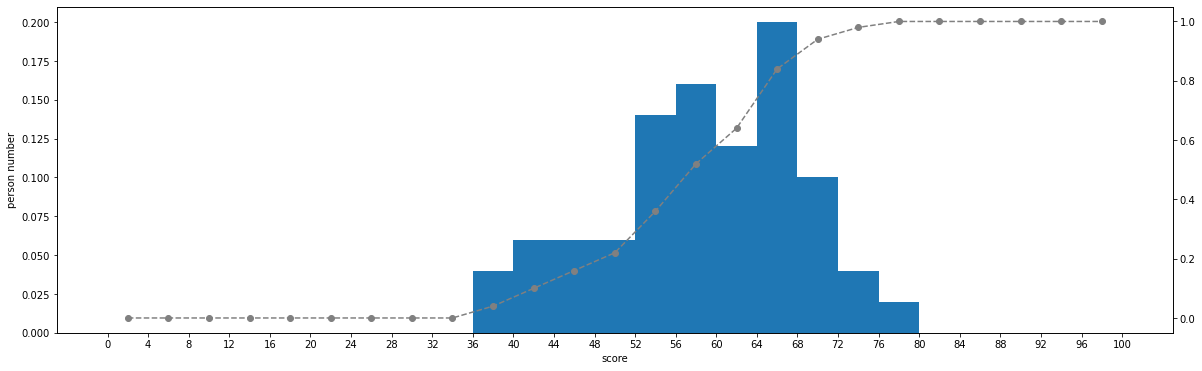

In [66]:
# 누적 히스토그램

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(111)
#y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음. 
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq,_,_ = ax1.hist(eng_scores, bins=25, range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()


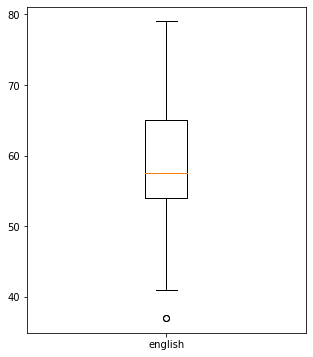

In [68]:
# 그림
fig =plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [73]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
print(mu)
s = np.sum((data-mu)**2)/len(data)
s

4.0


1.2

In [72]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

예시)
- 호수안에 물고기가 7마리가 있다. 몸 길이{1,2,3,4,5,6,7}, 모평균 4, 샘플링 3마리{1,2,3}, 표본평균 2
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [74]:
#[과제] 1변향(1차원)데이터 data에 대하여 평균, 표본분산, 불편분산, 편차, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요
# 단! 함수를 사용하는 경우와 사용하지 않는 경우를 모두 수행
data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [175]:
dft = data.copy()

In [121]:
# 평균
print(sum(data)/len(data))
mean = np.mean(data)
print(mean)

4.0
4.0


In [177]:
#표본분산
mu1 = np.sum(data)/len(data)
print(mu1)
s = np.sum((data-mu1)**2)/len(data)
s

4.0


1.2

In [176]:
np.var(dft)

1.2

In [178]:
# 불편분산
s3 = np.sum((data-mu1)**2)/(len(data)-1)
s3

1.3333333333333333

In [174]:
np.var(data, ddof=1)

1.3333333333333333

In [124]:
#편차
deviation = data - mean
deviation


array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [140]:
#표준편차
np.sqrt(np.var(data,ddof=0))

1.0954451150103321

In [166]:
np.std(data,ddof=0)

1.0954451150103321

In [165]:
#최대
np.max(data)

6

In [164]:
#최소
np.min(data)

2

In [182]:
b = data
max = b[0]
min = b[0]

for i in range(len(b)):
    if(max > b[i]):
        max = max
    else:
        max = b[i]
        
    if(min < b[i]):
        min=min
    else:
        min = b[i]
        
print("최대값:",max)
print("최소값:",min)

최대값: 6
최소값: 2


In [202]:
#4분위수
data_Q1 = np.percentile(data,25)
data_Q3 = np.percentile(data,75)
print(data_Q3)
print(data_Q1)


4.75
3.25


In [186]:
sp = np.median(data)
sp

4.0

4.75

In [133]:
#중앙값
n = len(data)
if n % 2 ==0:
    m0 = data[n//2-1]
    m1 = data[n//2]
    median = (m0 + m1) / 2
else:
    median = data[(n+1)//2 -1]
print(median,'\n')
np.median(data)

4.0 



4.0

## 2차원 데이터

In [88]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,
                    'mathematics':ms_scores},
                   index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [89]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [90]:
dfc['product of deviation'].mean()

62.8

In [91]:
#ddof 확인 요망
cov_mat = np.cov(en_scores,ms_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [92]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [100]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1] /(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [98]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [101]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [ ]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요
# (단, numpy,pandas 두가지 방식으로 모두 수행)

In [147]:
gdf = np.arange(20).reshape(10,2)
gdf

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [150]:
gdf.mean(axis=0)

array([ 9., 10.])

In [151]:
gdf.var(axis=0)

array([33., 33.])

In [160]:
sdf = pd.DataFrame({'english':en_scores,
                    'mathematics':ms_scores},
                   index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head(10)

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [161]:
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [162]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [163]:
np.cov(en_scores,ms_scores,ddof=0)[0,1] /(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

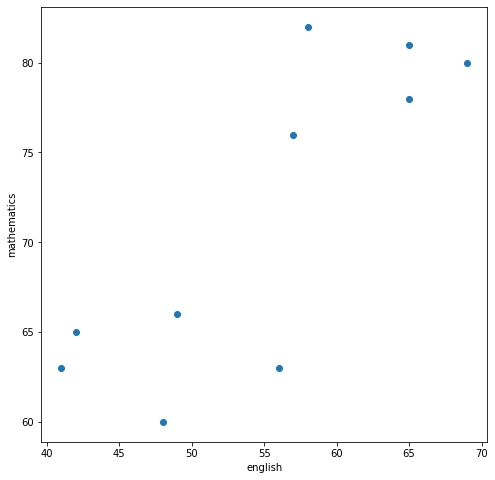

In [104]:
# 산점도
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()  # 넣지 않아도 나옴(적지 않으면 메모리에 남아서 섞일 수 있음)